In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
dig=load_digits()
dig.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

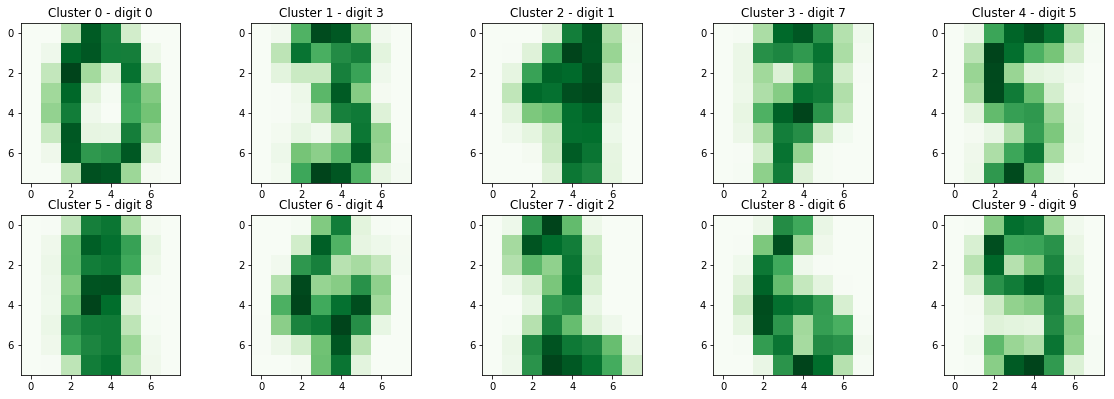

In [5]:
#task1

from scipy.cluster.vq import kmeans
import numpy as np

k=10
dig1=dig.images.reshape(1797, -1)
centroids, distortion=kmeans(dig1,k)
dig1 = np.expand_dims(dig1, axis = 1)
labels = np.argmin(((dig1-centroids) ** 2).sum(axis = 2), axis = 1)
plt.figure(figsize=(20,10))
for i in range(k):
    mask=labels==i
    plt.subplot(3,5,i+1)
    plt.title("Cluster {} - digit {}".format(i, np.argmax(np.bincount(dig.target[mask]))))
    plt.imshow(centroids[i].reshape(8,8), cmap="Greens")

In [11]:
#task2

def error(digits, labels, i):
    return ((labels==i).sum()-np.max(np.bincount(dig.target[labels==i])))/(labels==i).sum()
for i in range(10):
    print("Error is in cluster ", i, ", the error is", error(dig, labels, i))

Error is in cluster  0 , the error is 0.011235955056179775
Error is in cluster  1 , the error is 0.1340782122905028
Error is in cluster  2 , the error is 0.375
Error is in cluster  3 , the error is 0.15422885572139303
Error is in cluster  4 , the error is 0.13836477987421383
Error is in cluster  5 , the error is 0.545045045045045
Error is in cluster  6 , the error is 0.017857142857142856
Error is in cluster  7 , the error is 0.15428571428571428
Error is in cluster  8 , the error is 0.027472527472527472
Error is in cluster  9 , the error is 0.4326530612244898


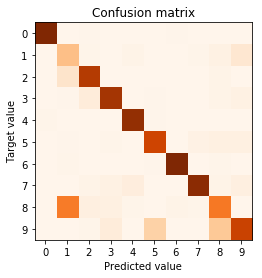

In [12]:
#task3

clusters=[]
for i in range(10):
    clusters.append(np.argmax(np.bincount(dig.target[labels==i])))
dig2=[]
for i in range(dig.target.shape[0]):
    dig2.append(clusters[labels[i]])
dig2=np.array(dig2)
conf=np.array([[((dig.target==i) * (dig2==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(conf, cmap='Oranges')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Confusion matrix")
plt.ylabel("Target value")
plt.xlabel("Predicted value")
plt.show()

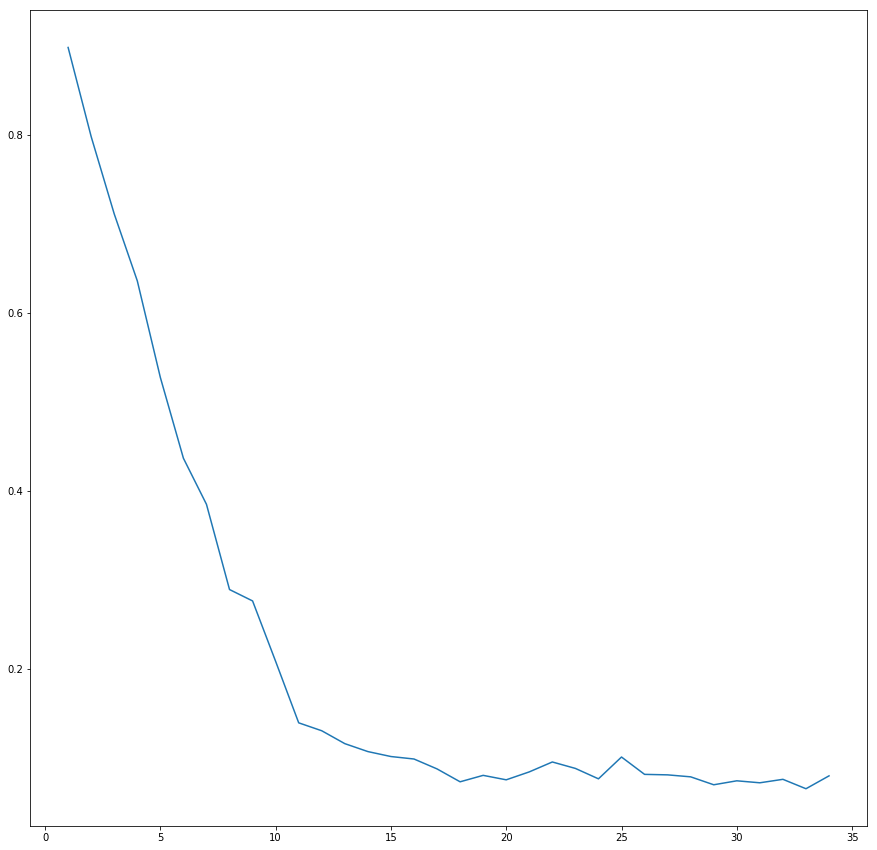

In [13]:
#task4

def pred(k):
    clusters=[]
    dig2=[]
    dig1=dig.images.reshape(1797, -1)
    centroids=kmeans(dig1,k)[0]
    dig1 = np.expand_dims(dig1, axis = 1)
    labels = np.argmin(((dig1-centroids) ** 2).sum(axis = 2), axis = 1)
    for i in range(k):
        clusters.append(np.argmax(np.bincount(dig.target[labels==i])))
    for i in range(dig.target.shape[0]):
        dig2.append(clusters[labels[i]])
    return dig2, clusters,centroids
errors=[(dig.target!=pred(i)[0]).sum()/len(dig.target) for i in range(1,35)]
plt.figure(figsize=(15,15))
plt.plot(range(1,35), errors)

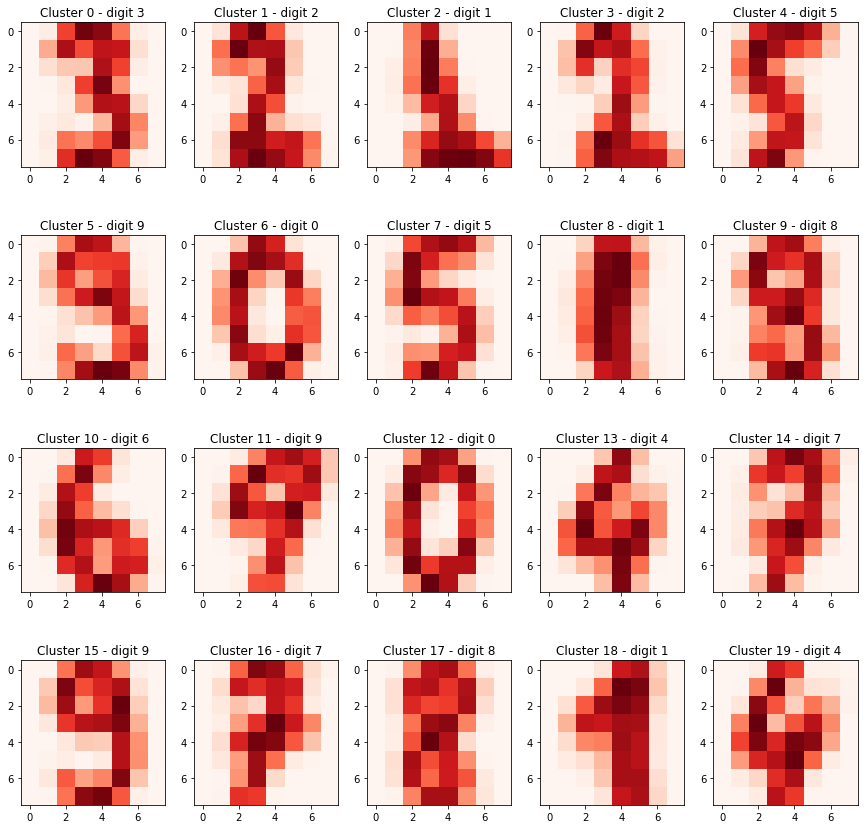

In [14]:
#task5

dig2, clusters,centroids=pred(20)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluster {} - digit {}'.format(i, clusters[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='Reds')